# Reference
1. https://repository.aust.edu.ng/xmlui/bitstream/handle/123456789/4903/Muibideen%20Mistura.pdf?sequence=1&isAllowed=y
2. https://github.com/gavinest/knn_predicting_heart_disease/blob/master/eda.ipynb

# Components to build a graphical model from data
1. structure learning algorithm - Hill climbing
2. Bayesian fit
3. Parameter learning


## install pgmpy

In [0]:
!pip install pgmpy

# How to make use of bayesian fit and get cpds- toy example

In [3]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
import pandas as pd

data = {'X': [0, 0, 0, 0, 1, 1, 1, 1], 'Z': [0, 0, 0, 1, 0, 1, 1, 1]}
data_xz = pd.DataFrame(data)

model_xz = BayesianModel([('X','Z')])

model_xz.fit(data_xz, estimator=MaximumLikelihoodEstimator)

print (model_xz.get_cpds('Z'))

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Z(0) | 0.75 | 0.25 |
+------+------+------+
| Z(1) | 0.25 | 0.75 |
+------+------+------+


print ('\n Model-2: P(Z|X,Y)')
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

data = {'X': [0, 0, 0, 0, 1, 1, 1, 1], 'Y': [0, 0, 1, 1, 0, 0, 1, 1], 'Z': [0, 0, 0, 1, 0, 1, 1, 1]}
data_xyz1 = pd.DataFrame(data)
model_xyz1 = BayesianModel([('X','Z'), ('Y','Z')])
model_xyz1.fit(data_xyz1, estimator=MaximumLikelihoodEstimator)
print (model_xyz1.get_cpds('Z'))
 

# Heart disease model


# mount google drive

In [4]:
from google.colab import drive
drive.mount('gdrive')

import os
os.chdir('/content/gdrive/My Drive/Colab_Notebooks/graphical-models/heart-model')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


# Import libraries

In [0]:
#https://github.com/gavinest/knn_predicting_heart_disease/blob/master/eda.ipynb
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Import data

In [0]:
#import dataset while naming columns
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('processed.cleveland.data', index_col=False, names=cols, header=None)

![alt text](https://imghostr.com/image.php?sig=ErhCDkaxa&h=5a3cae325e59dd0818871c8177055165&t=1586428087)

## Exploratory data analysis

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
#investigate object datatypes
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [0]:
#replace '?' with 'np.nan' for now to avoid errors in eda
#cast dtypes as float
def clean(x):
    if x.strip() == '?':
        return np.nan
    else:
        return x

df['ca'] = df['ca'].apply(clean).astype('float64')
df['thal'] = df['thal'].apply(clean).astype('float64')


In [12]:
print(df['ca'].unique())
print(df['thal'].unique())

[ 0.  3.  2.  1. nan]
[ 6.  3.  7. nan]


In [13]:
#drop rows with nans for now. only looses 6 rows. 
df.dropna(inplace=True)
print(df.shape)

(297, 14)


In [14]:
for col in df.columns.tolist():
    print(col, len(df[col].unique()))

age 41
sex 2
cp 4
trestbps 50
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 4
thal 3
num 5


In [15]:
#separate categorical variables from continuous
cat_var = [col for col in df.columns.tolist() if len(df[col].unique()) <=5]
print(len(cat_var))
cont_var = [col for col in df.columns.tolist() if len(df[col].unique()) > 5]
print(len(cont_var))

9
5


IndexError: ignored

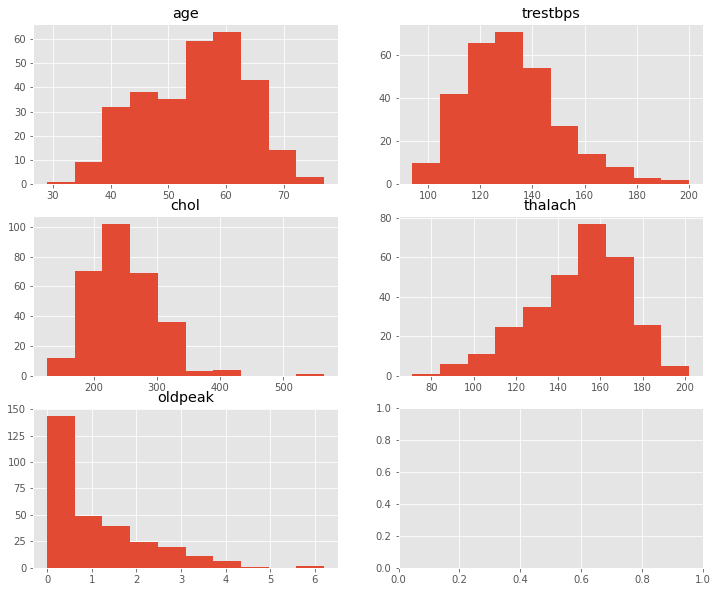

In [16]:
#explore distributions of continuous variables
fig, axes = plt.subplots(3,2, figsize=(12,10))
for i, ax in enumerate(axes.flatten()):
    column_name = cont_var[i]
    ax.hist(df[column_name])
    ax.set_title(column_name)

plt.tightlayout()

In [0]:
fig, axes = plt.subplots(2, 5, figsize=(12,10))
for i, ax in enumerate(axes.flatten()):
    column_name = cat_var[i]
    ax.hist(df[column_name])
    ax.set_title(column_name)

plt.tightlayout()

In [0]:
# #change predictor ('num') col to boolean
df['num'] = df['num'] > 0
df['num'] = df['num'].map({False: 0, True: 1})

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


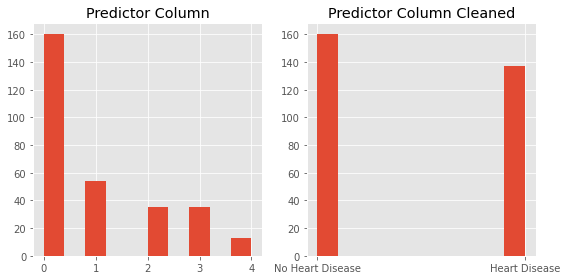

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.hist(df['num'])
ax1.set_title('Predictor Column')

#change predictor ('num') col to boolean
df['num'] = df['num'] > 0
df['num'] = df['num'].map({False: 0, True: 1})

ax2.hist(df['num'])
ax2.set_title('Predictor Column Cleaned')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.savefig('predictor_column.png')

# Discritization of variables

In [0]:
bins = [28, 45, 64, 79]
names = [0, 1, 2]
df['AgeC'] = pd.cut(df['age'], bins, labels = names)

In [20]:
df.age

0      63.0
1      67.0
2      67.0
3      37.0
4      41.0
       ... 
297    57.0
298    45.0
299    68.0
300    57.0
301    57.0
Name: age, Length: 297, dtype: float64

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,AgeC
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [0]:
# trestbps 
bins = [90, 120, 140, 201]
names = [0, 1, 2]

df['trestbpsC'] = pd.cut(df['trestbps'], bins , labels = names)

In [0]:
# chol attribute
bins = [125, 200, 240, 565]
names = [0, 1, 2]
df['cholC'] = pd.cut(df['chol'], bins, labels = names)

In [0]:
# To discritize thalach attribute
df['220-age'] = 220 - df['age']
df['thalachC'] = df['220-age'] < df['thalach']
df['thalachC'].replace([True, False], [1, 0], inplace = True)

In [0]:
# To discritize oldpeak 
bins = [-1, 2, 6.3]
names = [0, 1]

df['oldpeakC'] = pd.cut(df['oldpeak'], bins, labels = names)

In [0]:
df_heart = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num', 'AgeC', 'trestbpsC', 'cholC', 'thalachC', 'oldpeakC']]

In [0]:
#df_heart = df[['num', 'AgeC', 'trestbpsC', 'cholC', 'thalachC', 'oldpeakC']]

In [63]:
df_heart.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,num,AgeC,trestbpsC,cholC,thalachC,oldpeakC
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0,0,1,2,1,0,1
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0,1,2,2,2,0,0
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0,1,2,0,1,0,1
3,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0,0,1,2,1,1
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,0,0,1,1,0,0


# Learn network structure: Hill climbing
Performs local hill climb search to estimates the DAG structure that has optimal score, according to the scoring method supplied in the constructor. Starts at model start and proceeds by step-by-step network modifications until a local maximum is reached. Only estimates network structure, no parametrization.

In [0]:
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore

# Initialise Hill Climbing Estimator 
hc = HillClimbSearch(df_heart, scoring_method=BicScore(df_heart))
model = hc.estimate()

In [65]:
sorted(model.nodes())

['AgeC',
 'ca',
 'cholC',
 'cp',
 'exang',
 'fbs',
 'num',
 'oldpeakC',
 'restecg',
 'sex',
 'slope',
 'thal',
 'thalachC',
 'trestbpsC']

In [66]:
model.edges()

OutEdgeView([('cp', 'num'), ('cp', 'exang'), ('slope', 'oldpeakC'), ('slope', 'thalachC'), ('ca', 'AgeC'), ('thal', 'sex'), ('num', 'thal'), ('num', 'ca'), ('num', 'slope'), ('num', 'oldpeakC'), ('AgeC', 'trestbpsC')])

# Learn parameters of the network

In [0]:
from pgmpy.models import BayesianModel 
from pgmpy.estimators import HillClimbSearch 
from pgmpy.estimators import BayesianEstimator 

expert = BayesianModel(); 
expert.add_nodes_from(df_heart); 
expert.add_edges_from([('cp', 'num'), ('cp', 'exang'), 
                       ('slope', 'oldpeakC'), ('slope', 'thalachC'),
                       ('ca', 'AgeC'), ('thal', 'sex'),
                       ('num', 'thal'), ('num', 'ca'),
                       ('num', 'slope'), ('num', 'oldpeakC'),
                       ('AgeC', 'trestbpsC')]);

model = hc.estimate(expert); 


In [0]:
model.fit(df_heart, 
          estimator=BayesianEstimator,
          prior_type="K2");


In [69]:
model.get_cpds()

[<TabularCPD representing P(sex:2 | thal:3) at 0x7ff79ce53550>,
 <TabularCPD representing P(cp:4) at 0x7ff79ce53208>,
 <TabularCPD representing P(fbs:2) at 0x7ff79ce53e48>,
 <TabularCPD representing P(restecg:3) at 0x7ff79ce53c50>,
 <TabularCPD representing P(exang:2 | cp:4) at 0x7ff79cf49198>,
 <TabularCPD representing P(slope:3 | num:2) at 0x7ff79c90a908>,
 <TabularCPD representing P(ca:4 | num:2) at 0x7ff79c90aa58>,
 <TabularCPD representing P(thal:3 | num:2) at 0x7ff79c90ad68>,
 <TabularCPD representing P(num:2 | cp:4) at 0x7ff79c90a7f0>,
 <TabularCPD representing P(AgeC:3 | ca:4) at 0x7ff79c90a2b0>,
 <TabularCPD representing P(trestbpsC:3 | AgeC:3) at 0x7ff79c90a048>,
 <TabularCPD representing P(cholC:3) at 0x7ff79c90af60>,
 <TabularCPD representing P(thalachC:2 | slope:3) at 0x7ff79c90ae48>,
 <TabularCPD representing P(oldpeakC:2 | num:2, slope:3) at 0x7ff79c90a208>]

# cpts of nodes with parents

In [72]:
print(model.get_cpds('sex'))

+----------+--------------------+-----------+---------------------+
| thal     | thal(3.0)          | thal(6.0) | thal(7.0)           |
+----------+--------------------+-----------+---------------------+
| sex(0.0) | 0.4879518072289157 | 0.1       | 0.13675213675213677 |
+----------+--------------------+-----------+---------------------+
| sex(1.0) | 0.5120481927710844 | 0.9       | 0.8632478632478633  |
+----------+--------------------+-----------+---------------------+


In [71]:
print(model.get_cpds('oldpeakC'))

+-------------+---------------------+------------+---------------------+---------------------+--------------------+---------------------+
| num         | num(0)              | num(0)     | num(0)              | num(1)              | num(1)             | num(1)              |
+-------------+---------------------+------------+---------------------+---------------------+--------------------+---------------------+
| slope       | slope(1.0)          | slope(2.0) | slope(3.0)          | slope(1.0)          | slope(2.0)         | slope(3.0)          |
+-------------+---------------------+------------+---------------------+---------------------+--------------------+---------------------+
| oldpeakC(0) | 0.9809523809523809  | 0.94       | 0.5454545454545454  | 0.9210526315789473  | 0.6483516483516484 | 0.21428571428571427 |
+-------------+---------------------+------------+---------------------+---------------------+--------------------+---------------------+
| oldpeakC(1) | 0.0190476190476190

In [73]:
print(model.get_cpds('AgeC'))

+---------+--------------------+---------------------+---------------------+---------------------+
| ca      | ca(0.0)            | ca(1.0)             | ca(2.0)             | ca(3.0)             |
+---------+--------------------+---------------------+---------------------+---------------------+
| AgeC(0) | 0.3107344632768362 | 0.08823529411764706 | 0.04878048780487805 | 0.08695652173913043 |
+---------+--------------------+---------------------+---------------------+---------------------+
| AgeC(1) | 0.5988700564971752 | 0.7352941176470589  | 0.7073170731707317  | 0.6086956521739131  |
+---------+--------------------+---------------------+---------------------+---------------------+
| AgeC(2) | 0.0903954802259887 | 0.17647058823529413 | 0.24390243902439024 | 0.30434782608695654 |
+---------+--------------------+---------------------+---------------------+---------------------+


In [50]:
print(model.get_cpds('trestbpsC'))

+--------------+----------+---------------------+---------------------+
| AgeC         | AgeC(0)  | AgeC(1)             | AgeC(2)             |
+--------------+----------+---------------------+---------------------+
| trestbpsC(0) | 0.53125  | 0.25757575757575757 | 0.3409090909090909  |
+--------------+----------+---------------------+---------------------+
| trestbpsC(1) | 0.390625 | 0.5151515151515151  | 0.22727272727272727 |
+--------------+----------+---------------------+---------------------+
| trestbpsC(2) | 0.078125 | 0.22727272727272727 | 0.4318181818181818  |
+--------------+----------+---------------------+---------------------+


In [51]:
print(model.get_cpds('thalachC'))

+-------------+---------------------+---------------------+
| oldpeakC    | oldpeakC(0)         | oldpeakC(1)         |
+-------------+---------------------+---------------------+
| thalachC(0) | 0.751004016064257   | 0.9038461538461539  |
+-------------+---------------------+---------------------+
| thalachC(1) | 0.24899598393574296 | 0.09615384615384616 |
+-------------+---------------------+---------------------+


In [75]:
print(model.get_cpds('thal'))

+-----------+---------------------+---------------------+
| num       | num(0)              | num(1)              |
+-----------+---------------------+---------------------+
| thal(3.0) | 0.7852760736196319  | 0.2714285714285714  |
+-----------+---------------------+---------------------+
| thal(6.0) | 0.04294478527607362 | 0.09285714285714286 |
+-----------+---------------------+---------------------+
| thal(7.0) | 0.17177914110429449 | 0.6357142857142857  |
+-----------+---------------------+---------------------+


In [76]:
print(model.get_cpds('ca'))

+---------+----------------------+---------------------+
| num     | num(0)               | num(1)              |
+---------+----------------------+---------------------+
| ca(0.0) | 0.7926829268292683   | 0.3262411347517731  |
+---------+----------------------+---------------------+
| ca(1.0) | 0.13414634146341464  | 0.3191489361702128  |
+---------+----------------------+---------------------+
| ca(2.0) | 0.04878048780487805  | 0.22695035460992907 |
+---------+----------------------+---------------------+
| ca(3.0) | 0.024390243902439025 | 0.1276595744680851  |
+---------+----------------------+---------------------+


In [77]:
print(model.get_cpds('slope'))

+------------+---------------------+---------------------+
| num        | num(0)              | num(1)              |
+------------+---------------------+---------------------+
| slope(1.0) | 0.6380368098159509  | 0.2642857142857143  |
+------------+---------------------+---------------------+
| slope(2.0) | 0.3006134969325153  | 0.6428571428571429  |
+------------+---------------------+---------------------+
| slope(3.0) | 0.06134969325153374 | 0.09285714285714286 |
+------------+---------------------+---------------------+


In [78]:
print(model.get_cpds('exang'))

+------------+---------+---------------------+--------------------+--------------------+
| cp         | cp(1.0) | cp(2.0)             | cp(3.0)            | cp(4.0)            |
+------------+---------+---------------------+--------------------+--------------------+
| exang(0.0) | 0.8     | 0.9019607843137255  | 0.8588235294117647 | 0.4513888888888889 |
+------------+---------+---------------------+--------------------+--------------------+
| exang(1.0) | 0.2     | 0.09803921568627451 | 0.1411764705882353 | 0.5486111111111112 |
+------------+---------+---------------------+--------------------+--------------------+


In [82]:
print(model.get_cpds('sex'))

+----------+--------------------+-----------+---------------------+
| thal     | thal(3.0)          | thal(6.0) | thal(7.0)           |
+----------+--------------------+-----------+---------------------+
| sex(0.0) | 0.4879518072289157 | 0.1       | 0.13675213675213677 |
+----------+--------------------+-----------+---------------------+
| sex(1.0) | 0.5120481927710844 | 0.9       | 0.8632478632478633  |
+----------+--------------------+-----------+---------------------+


# Nodes that does't have parents??

In [83]:
print(model.get_cpds('cp'))

+---------+-----------+
| cp(1.0) | 0.0797342 |
+---------+-----------+
| cp(2.0) | 0.166113  |
+---------+-----------+
| cp(3.0) | 0.27907   |
+---------+-----------+
| cp(4.0) | 0.475083  |
+---------+-----------+


In [84]:
print(model.get_cpds('fbs'))

+----------+----------+
| fbs(0.0) | 0.852843 |
+----------+----------+
| fbs(1.0) | 0.147157 |
+----------+----------+


In [85]:
print(model.get_cpds('restecg'))

+--------------+-----------+
| restecg(0.0) | 0.493333  |
+--------------+-----------+
| restecg(1.0) | 0.0166667 |
+--------------+-----------+
| restecg(2.0) | 0.49      |
+--------------+-----------+


# Draw the network- Check how to improve it with node names in networkx

<Figure size 2880x1440 with 0 Axes>

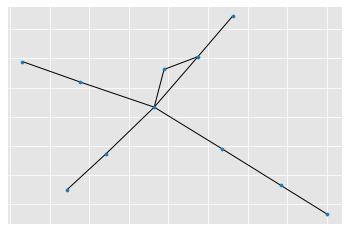

<Figure size 2880x1440 with 0 Axes>

In [91]:
import networkx as nx
import pylab as plt

G = nx.Graph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 10)
nx.draw_networkx_edges(G, pos, arrows = True)
plt.figure(5, figsize = (40, 20))

# Variable elimination

In [104]:
from pgmpy.inference import VariableElimination

model_infer = VariableElimination(model)

prob_num = model_infer.query(variables = ['num'])
print(prob_num)

Eliminating: AgeC: 100%|██████████| 13/13 [00:00<00:00, 595.50it/s]

+--------+------------+
| num    |   phi(num) |
+========+============+
| num(0) |     0.5364 |
+--------+------------+
| num(1) |     0.4636 |
+--------+------------+


In [106]:
prob_evidence = model_infer.query(variables = ['num'],
                                  evidence = {'slope': 1.0, 'oldpeakC': 0, 'AgeC': 0}) 
print(prob_evidence)

Eliminating: restecg: 100%|██████████| 10/10 [00:00<00:00, 659.60it/s]

+--------+------------+
| num    |   phi(num) |
+========+============+
| num(0) |     0.8374 |
+--------+------------+
| num(1) |     0.1626 |
+--------+------------+


In [0]:
fx